# Analyzing dimer size distribution

Vincent Ouazan-Reboul, 2025/04/07

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re

In [2]:
## Parameters - lifted from 00

n_particles = 10
n_sites = 10**3
phi_tot = n_particles / n_sites 

T_values = np.logspace(2, -3, 500)
beta_values = 1 / T_values

e_dimer = 10

In [3]:
# Theoretical distribution is easily calculated


def phi_1_theo(phi_tot, T, e = e_dimer):
    return (-1 + np.sqrt(1 + phi_tot * np.exp(2 * e / T) / 3)) / (np.exp(2 * e / T) / 6)

def phi_2_theo(phi_tot, T, e = e_dimer):
    return 0.5 * (phi_tot - phi_1_theo(phi_tot, T, e))

In [4]:
# Getting data
# Mean number of dimers is just mean energy / e

n_orientations = 24

all_averages = {}
path_to_data = Path("./data")

for face in range(n_orientations):
    this_run_folder = path_to_data / f"dimer_face_{face}/average_energy"
    for average_file in this_run_folder.iterdir():
        (this_T, mean_e, _) = np.loadtxt(average_file)
        if this_T not in all_averages.keys():
            all_averages[this_T] = mean_e
        else:
            all_averages[this_T] += mean_e
all_T = [] 
all_av_e = []

for T in np.sort(list(all_averages.keys())):
    all_T.append(T)
    all_av_e.append(all_averages[T] / n_orientations)

all_T = np.array(all_T)
all_av_e = np.array(all_av_e)

all_av_phi2 = all_av_e / (- e_dimer) / n_sites

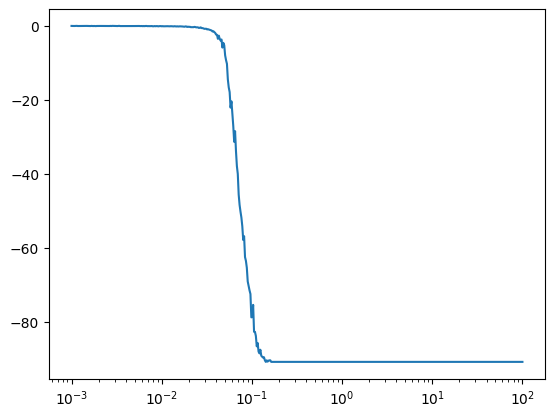

In [6]:
fig, ax = plt.subplots()

ax.semilogx(T_values, all_av_e)
# ax.plot(all_T, all_av_phi2, "o", alpha=0.2)


/var/folders/v3/gbqhvbxs6nz1258v43493tx40000gp/T/ipykernel_77227/1642699876.py:5: RuntimeWarning: overflow encountered in exp
  return (-1 + np.sqrt(1 + phi_tot * np.exp(2 * e / T) / 3)) / (np.exp(2 * e / T) / 6)
/var/folders/v3/gbqhvbxs6nz1258v43493tx40000gp/T/ipykernel_77227/1642699876.py:5: RuntimeWarning: invalid value encountered in divide
  return (-1 + np.sqrt(1 + phi_tot * np.exp(2 * e / T) / 3)) / (np.exp(2 * e / T) / 6)


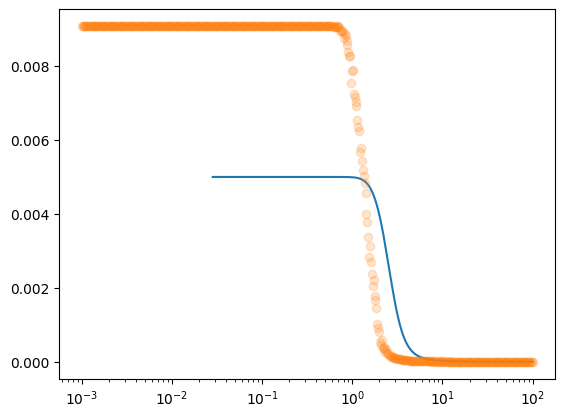

In [7]:
fig, ax = plt.subplots()

ax.semilogx(T_values, phi_2_theo(phi_tot, T_values))
ax.plot(all_T, all_av_phi2, "o", alpha=0.2)


In [117]:
all_av_e[-1]

-0.020833333333333332

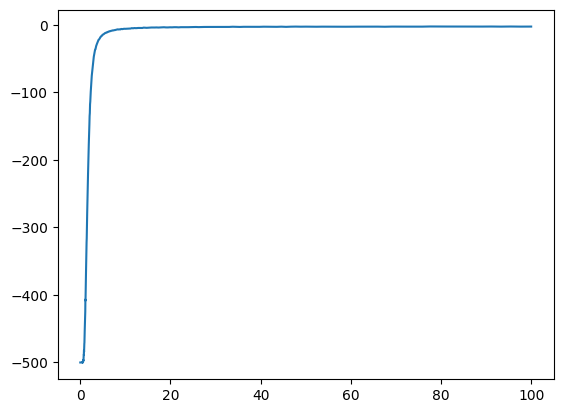

In [72]:
fig, ax = plt.subplots()

ax.plot(all_T, all_av_e)

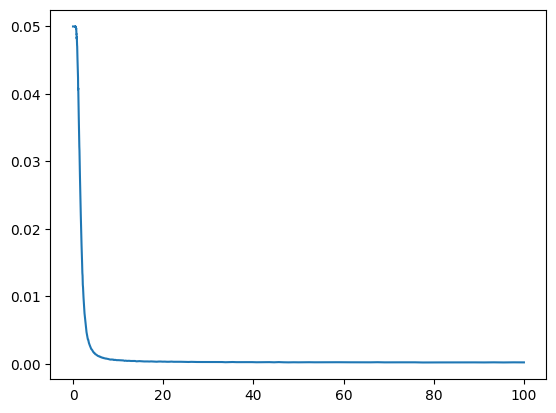

In [73]:
fig, ax = plt.subplots()

ax.plot(all_T, all_av_phi2)